<a href="https://colab.research.google.com/github/hanrockyhalim/MachineLearning/blob/main/Project_Based_Assignment_CLO_4_Kelompok_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Hanrocky Halim - 1301213446
2. Fauzan Almas S - 1301210558
3. Riza Aufa Yuwanata - 1301213460

# Latar Belakang
Machine Learning merupakan salah satu cabang ilmu dalam bidang Ilmu Komputer yang fokus pada pengembangan kemampuan komputer atau mesin untuk belajar dan menjadi cerdas. Dalam konteks ini, kecerdasan komputer atau mesin diukur oleh kemampuannya untuk mempelajari informasi.
Pada dasarnya, pembelajaran mesin memungkinkan komputer  meningkatkan kinerjanya dari waktu ke waktu tanpa memerlukan  pemrograman  ekstensif atau bimbingan manusia.
Proses pembelajaran ini dapat dilakukan melalui dua metode utama. Yang pertama adalah _supervised learning_ , yang mana model memperoleh wawasan dari kumpulan data yang dianotasi, dan yang lainnya adalah _unsupervised learning_, yang mana model memperoleh wawasan dari data yang tidak diberi label

Ensemble methods secara umum dapat digunakan baik pada tugas supervised learning maupun unsupervised learning, tergantung pada jenis algoritma dan pendekatan yang digunakan. Sebagian besar ensemble methods, seperti Voting Classifiers, Bagging, dan Boosting, secara khusus dikembangkan untuk tugas supervised learning, di mana terdapat variabel target atau keluaran yang diinginkan.

Pada kesempatan projek ini, kami menggunakan random forest sebagai metode yang akan diterapkan pada data yang sudah tersedia, sehingga dapat mengetahui performasi yang diberikan oleh metode ini yang membatu menambahkan pemahaman yang lebih lagi dari metode yang dipilih.

Dalam laporan ini, kami akan bereksplorasi terhadap konsep dasar yang terdapat pada pembelajaran mesin. Cara bereksplorasi ini akan diterapkan pada data tautan di bawah ini _https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption_,

![picture](https://drive.google.com/uc?id=13QqzRt6pDKiuC_dL3ZNaJaA5iSSgQAXM)
dengan kasus yang klasifikasi pada dataset yang dipilih.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv('https://raw.githubusercontent.com/hanrockyhalim/MachineLearning/main/Steel_industry_data.csv')
print(display(df))

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


None


Import package dan dataset yang akan digunakan

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
df.describe(include=["object"])

,date,WeekStatus,Day_of_week,Load_Type
count,35040,35040,35040,35040
unique,35040,2,7,3
top,01/01/2018 00:15,Weekday,Monday,Light_Load
freq,1,25056,5088,18072


# Data Preprocessing


In [ ]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
# Memeriksa apakah ada nilai null

print(df.isnull().sum())

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


In [ ]:
# Mengecek data duplikat

df.duplicated().sum()

0

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
print(df.shape)

(35040, 11)


# Exploration Data Analysis

In [ ]:
# Melihat keragaman nilai-nilai kategorikal pada tiap kolom
def show(df):
  for i in df.columns:
    print("Kolom {}: {}".format(i,df[i].unique()))

show(df)

Kolom date: ['01/01/2018 00:15' '01/01/2018 00:30' '01/01/2018 00:45' ...
 '31/12/2018 23:30' '31/12/2018 23:45' '31/12/2018 00:00']
Kolom Usage_kWh: [ 3.17  4.    3.24 ... 21.89 17.82 45.  ]
Kolom Lagging_Current_Reactive.Power_kVarh: [ 2.95  4.46  3.28 ... 69.77 74.56 70.67]
Kolom Leading_Current_Reactive_Power_kVarh: [ 0.    0.18 15.66 16.96 21.28 19.22 16.88 22.32 18.   16.92 23.4   5.65
  4.82  6.7   4.57 12.89 23.15 16.67 16.63 23.33 16.74 16.99 18.25 22.1
 16.7  19.33 21.35 16.81 20.45 20.77 21.64 19.19 23.51 17.39 17.35  8.96
  5.47 16.24 22.57 20.74 20.88 22.54 19.55 17.42 24.26 17.75 25.2  17.5
 10.08  0.07  0.11  0.94  1.15  0.54  0.14 18.9  25.92 25.34 25.49  6.52
  1.04  0.5   1.58  0.43  1.37  0.47  3.96 12.13 23.22 25.16 26.5  26.42
 26.46 15.44  0.04 26.21 25.56 25.74  6.08  1.69  1.94  0.79  1.66  1.22
  6.98 23.83 24.8  26.82 26.78 15.16 18.79 26.39 26.89  1.19  3.46  2.12
  2.77 24.08 25.78 25.85 14.65 20.2  26.32 25.81  7.6   3.56  0.61  4.43
 17.64 24.05 26.68 26.6

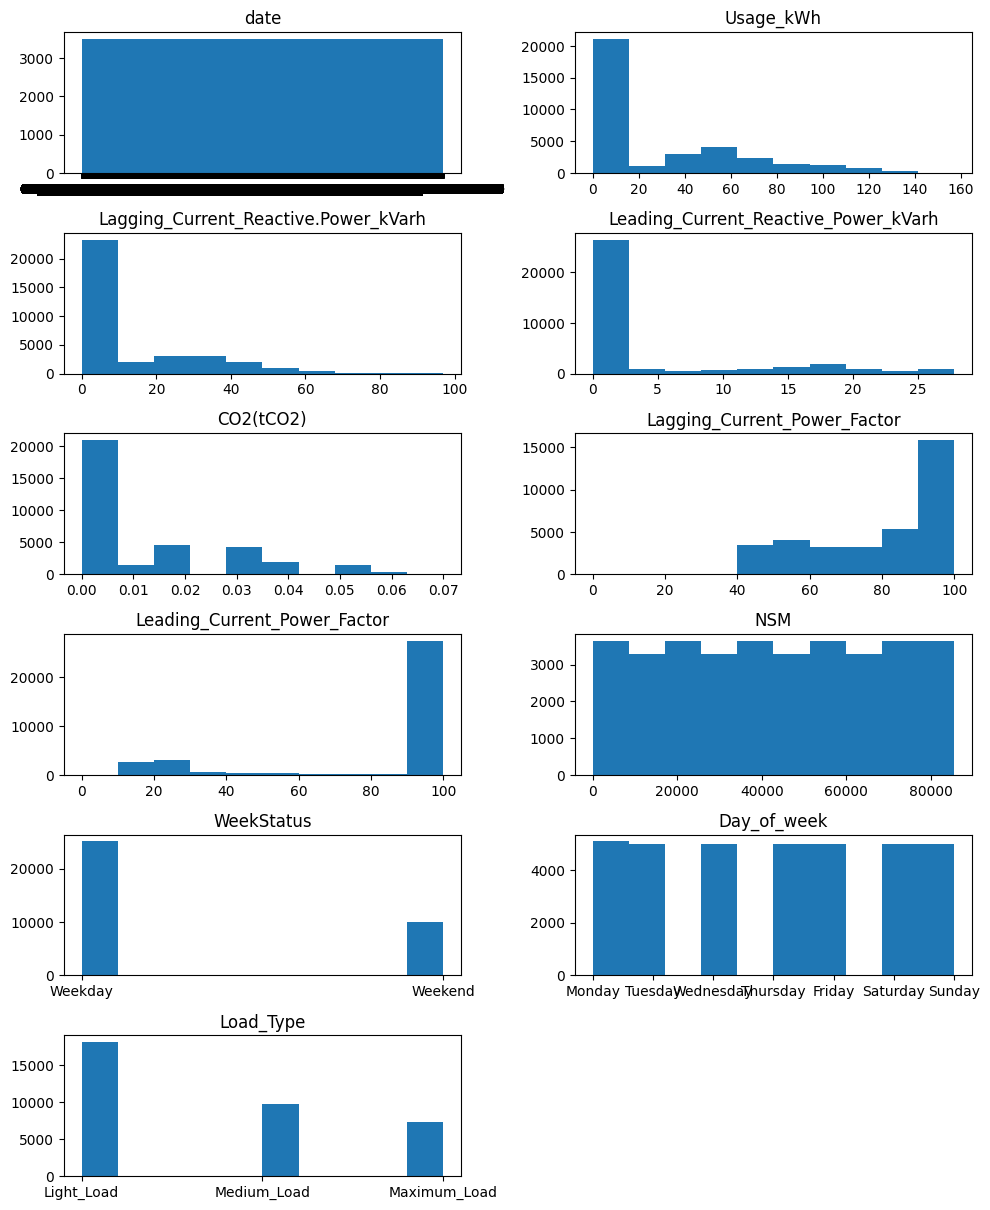

In [ ]:
# Melihat sebaran data menggunakan histogram
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,30))
for index,col in enumerate(df):
    plt.subplot(15,2,index+1)
    plt.title(col)
    plt.hist(df[col])
fig.tight_layout(pad=1.0);

<Axes: xlabel='Load_Type', ylabel='Usage_kWh'>

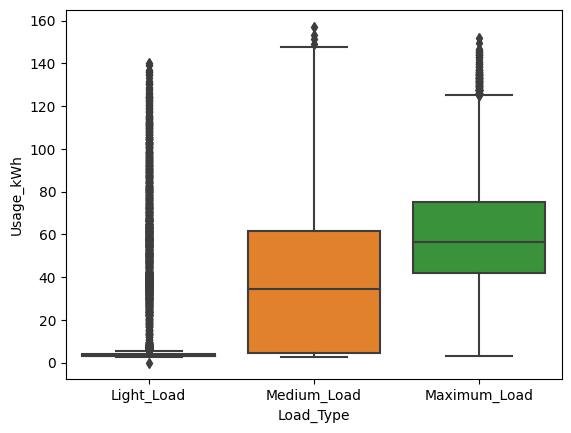

In [ ]:
# Load_Type terhadap Usage_kWh berdasarkan dataframe df
sns.boxplot(x = 'Load_Type', y = 'Usage_kWh', data = df )

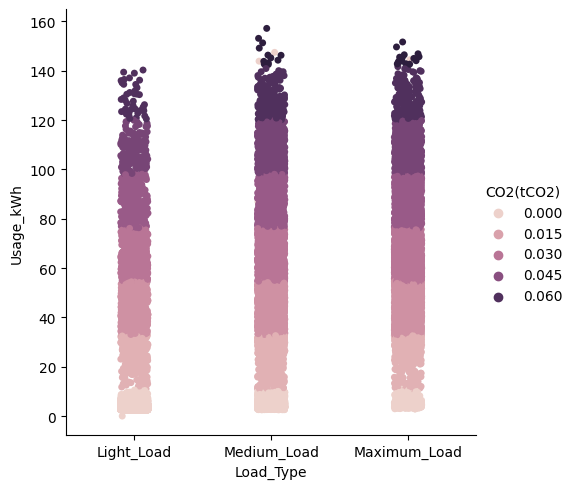

In [ ]:
# Load_Type terhadap Usage_kWh berdasarkan dataframe df
sns.catplot(x = 'Load_Type', y = 'Usage_kWh', hue = 'CO2(tCO2)', data = df)

<ipython-input-16-2374c8badf5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'pearson')


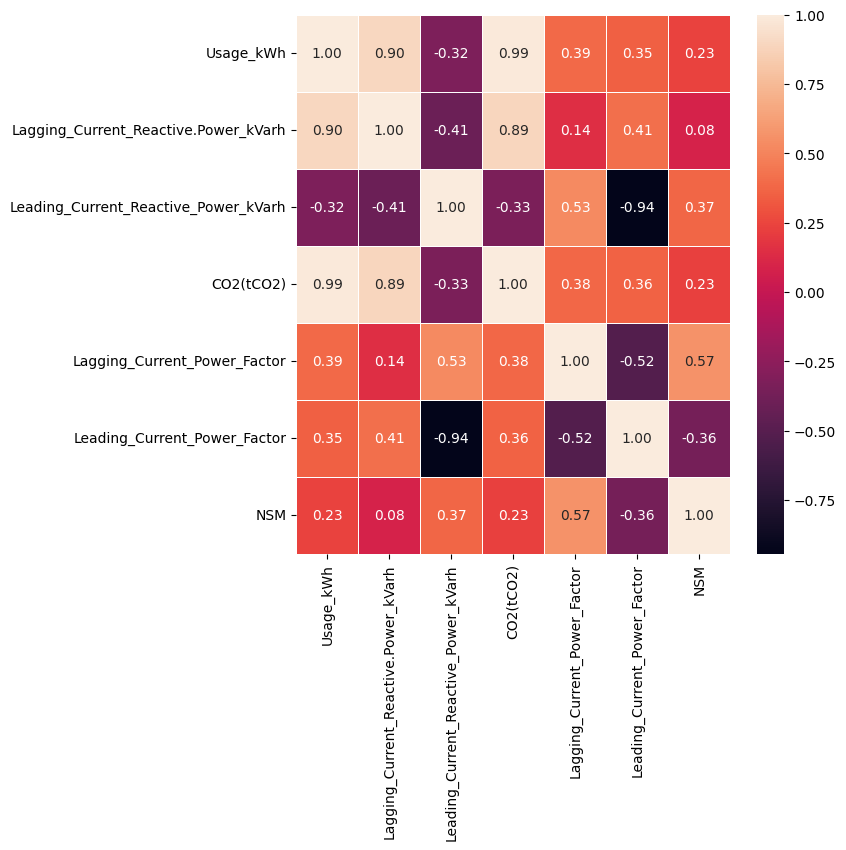

In [ ]:
# Pearson Correlations Matrix
corr = df.corr(method = 'pearson')
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()


In [ ]:
# Mapping untuk mengubah data bertipe objek ke integer (nilai numerik)

# Mapping 'Load_Type' dari kategori ke nilai numerik
load = {'Light_Load': 0, 'Medium_Load': 1, 'Maximum_Load': 2}
df['Load_Type'] = df['Load_Type'].map(load)
# Mapping 'Day_of_week' dari nama hari ke nilai numerik
day =  {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df['Day_of_week'] = df['Day_of_week'].map(day)
# Mapping 'WeekStatus' dari 'Weekday'/'Weekend' ke nilai numerik
week = {'Weekday': 0, 'Weekend': 1}
df['WeekStatus'] = df['WeekStatus'].map(week)

# Print data hasil mapping
print("WeekStatus:" , df['WeekStatus'].unique())
print("DayofWeek:" , df['Day_of_week'].unique())
print("LoadType:" , df['Load_Type'].unique())

WeekStatus: [0 1]
DayofWeek: [0 1 2 3 4 5 6]
LoadType: [0 1 2]


In [ ]:
# Exploration Data Analysis
# Write your code here

drop_columns = ['Load_Type','date']

X = df.drop(columns = drop_columns)

In [ ]:
Y = df[['Load_Type']]


In [ ]:
Y

,Load_Type
0,0
1,0
2,0
3,0
4,0
...,...
35035,0
35036,0
35037,0
35038,0


In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(Y))
sm = SMOTE()
X_res, Y_res = sm.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_res))

Original dataset shape Counter({'Load_Type': 1})
Resampled dataset shape Counter({'Load_Type': 1})


In [ ]:
#masukkan data ke dalam data frame
df = X_res
df['Load_Type'] = Y_res


In [ ]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.170000,2.950000,0.0,0.00,73.210000,100.0,900,0,0,0
1,4.000000,4.460000,0.0,0.00,66.770000,100.0,1800,0,0,0
2,3.240000,3.280000,0.0,0.00,70.280000,100.0,2700,0,0,0
3,3.310000,3.560000,0.0,0.00,68.090000,100.0,3600,0,0,0
4,3.820000,4.500000,0.0,0.00,64.720000,100.0,4500,0,0,0
...,...,...,...,...,...,...,...,...,...,...
54211,105.509917,63.693237,0.0,0.05,85.586204,100.0,42300,0,3,2
54212,52.728348,25.649081,0.0,0.02,89.922148,100.0,52200,0,0,2
54213,45.238468,13.956249,0.0,0.02,95.545202,100.0,37800,0,3,2
54214,60.231772,37.321513,0.0,0.03,84.958464,100.0,82800,0,1,2


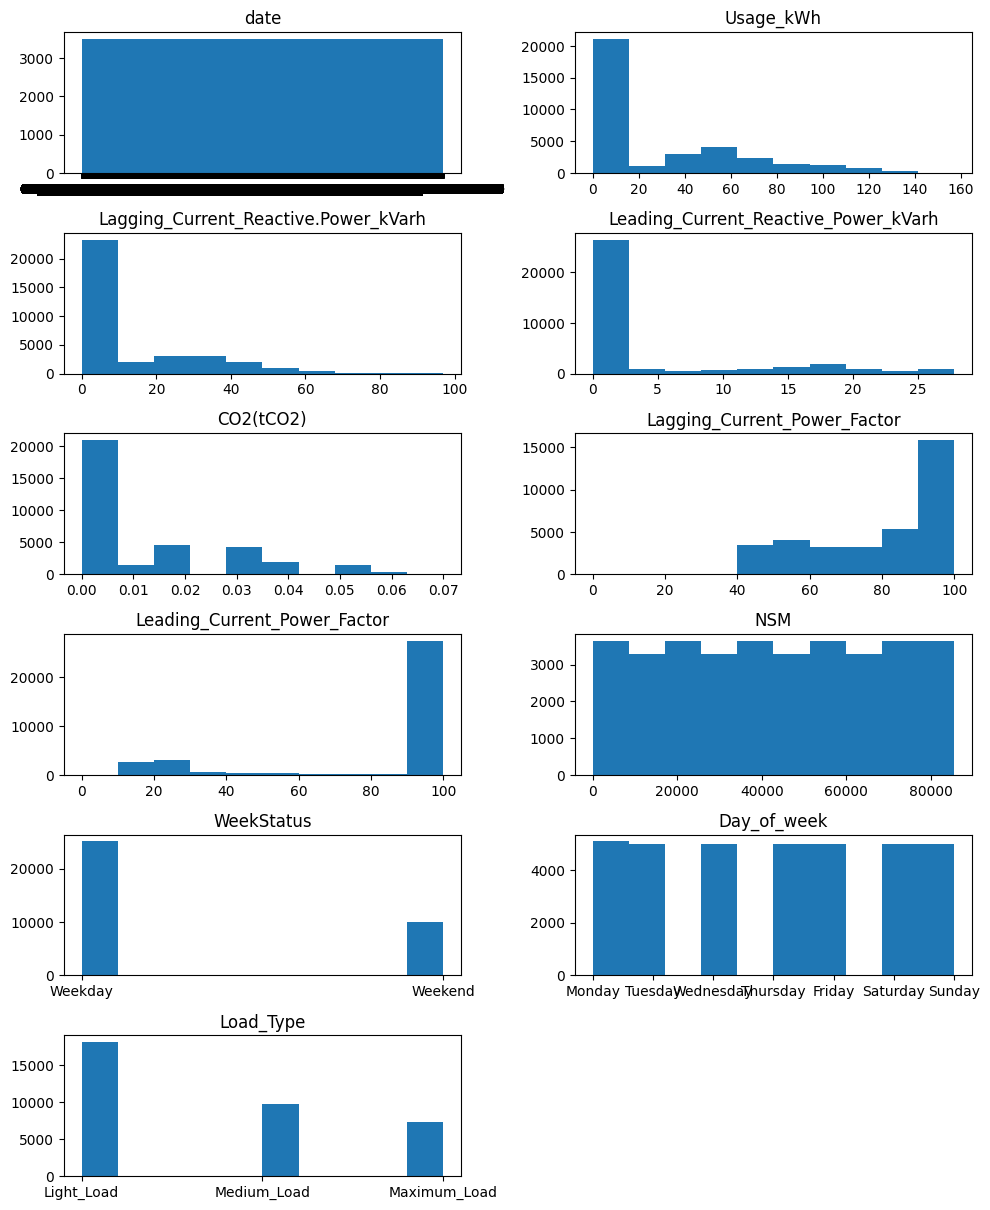

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize=(10,30))
for index,col in enumerate(df):
    plt.subplot(15,2,index+1)
    plt.title(col)
    plt.hist(df[col])
fig.tight_layout(pad=1.0);

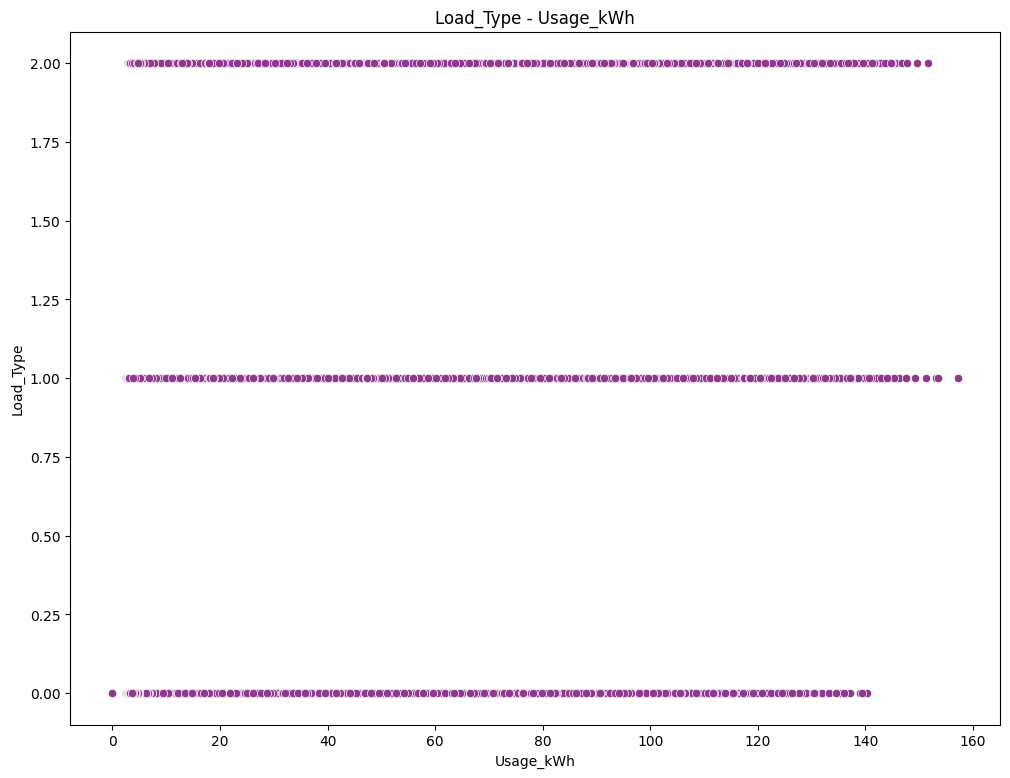

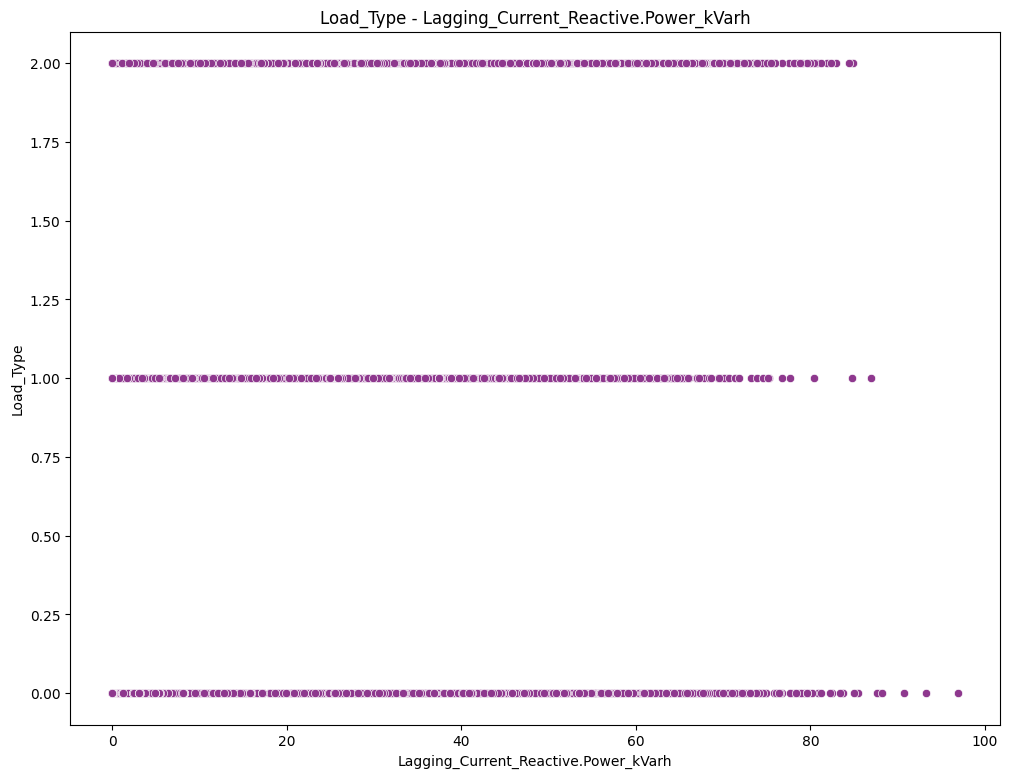

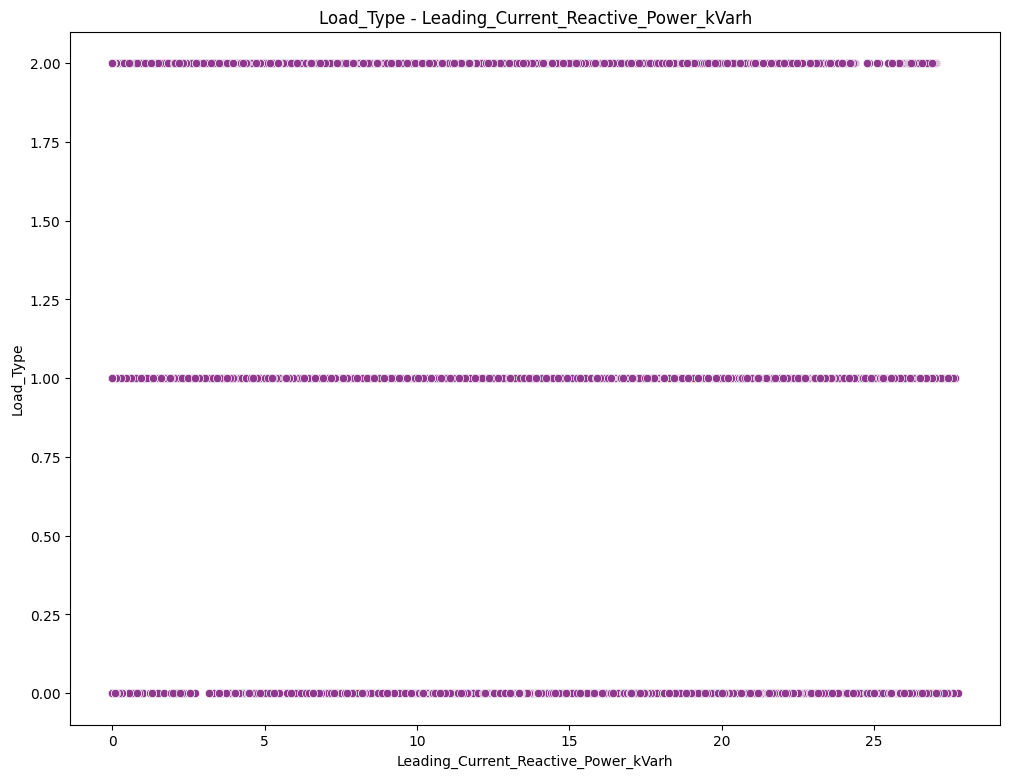

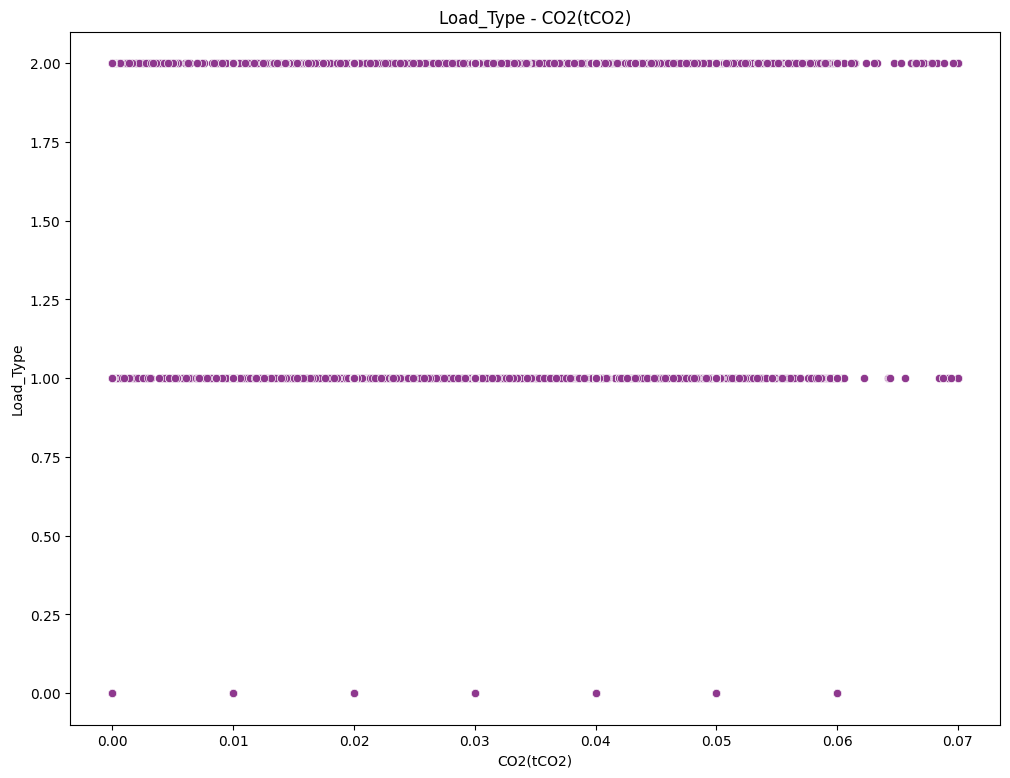

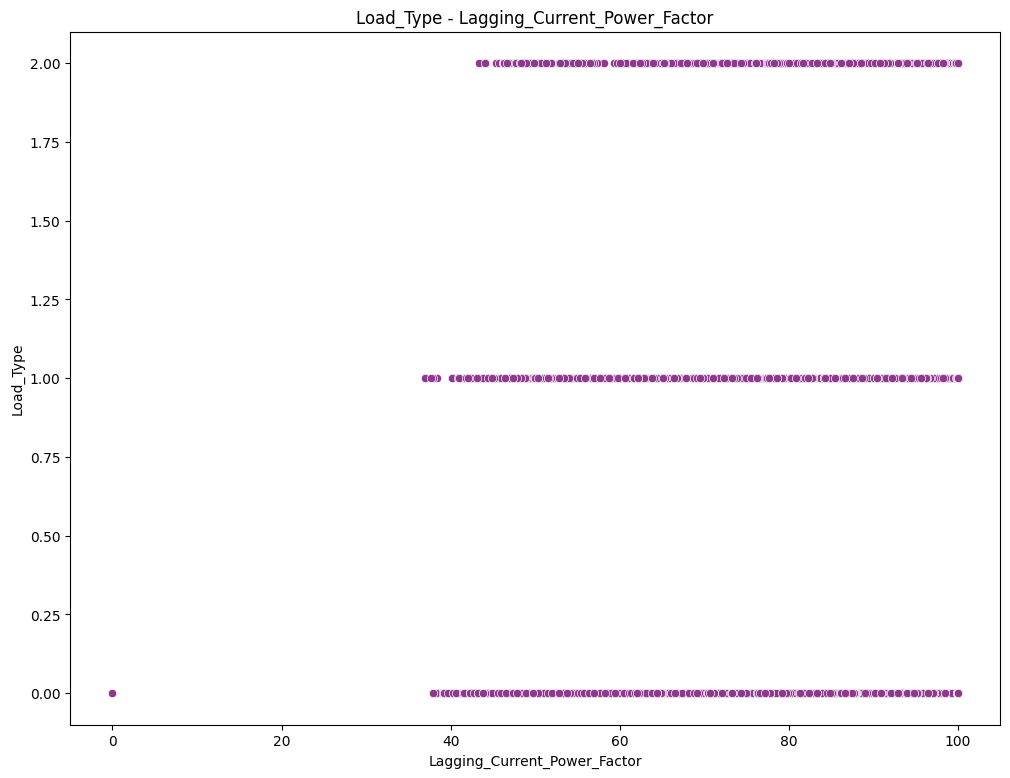

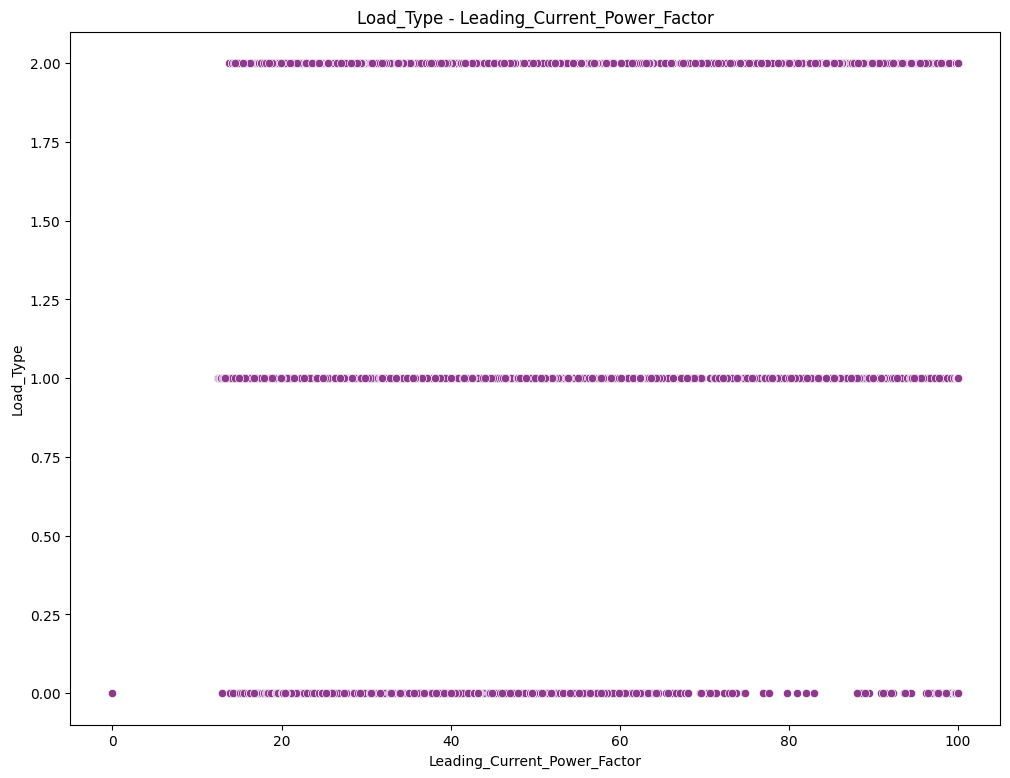

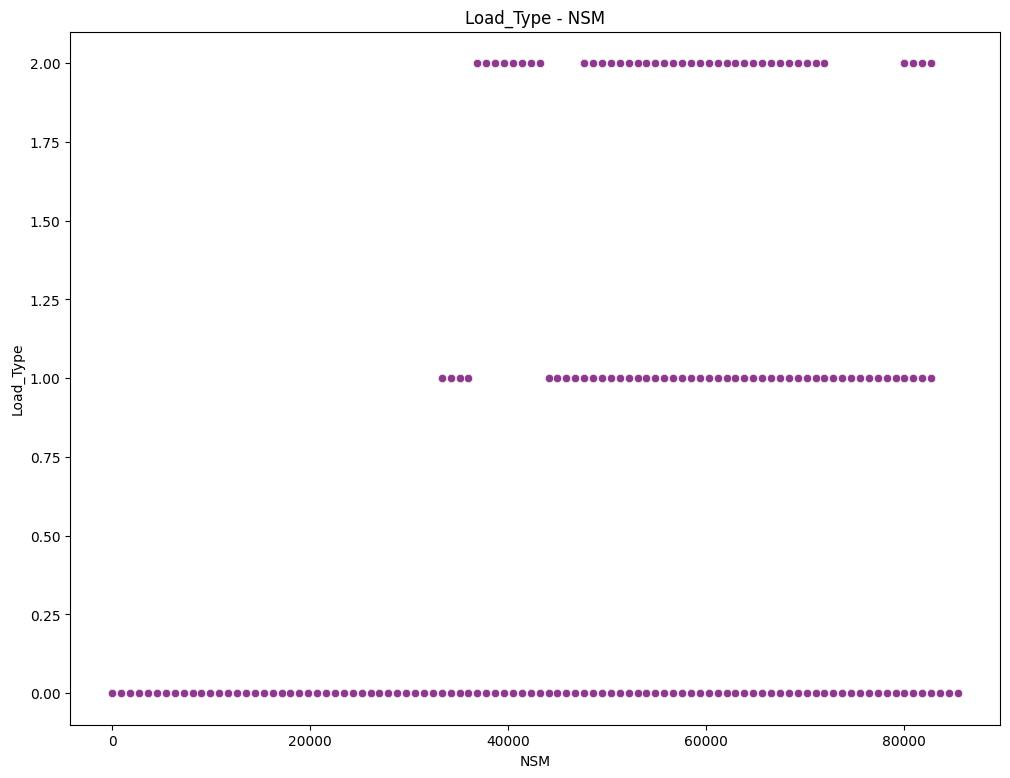

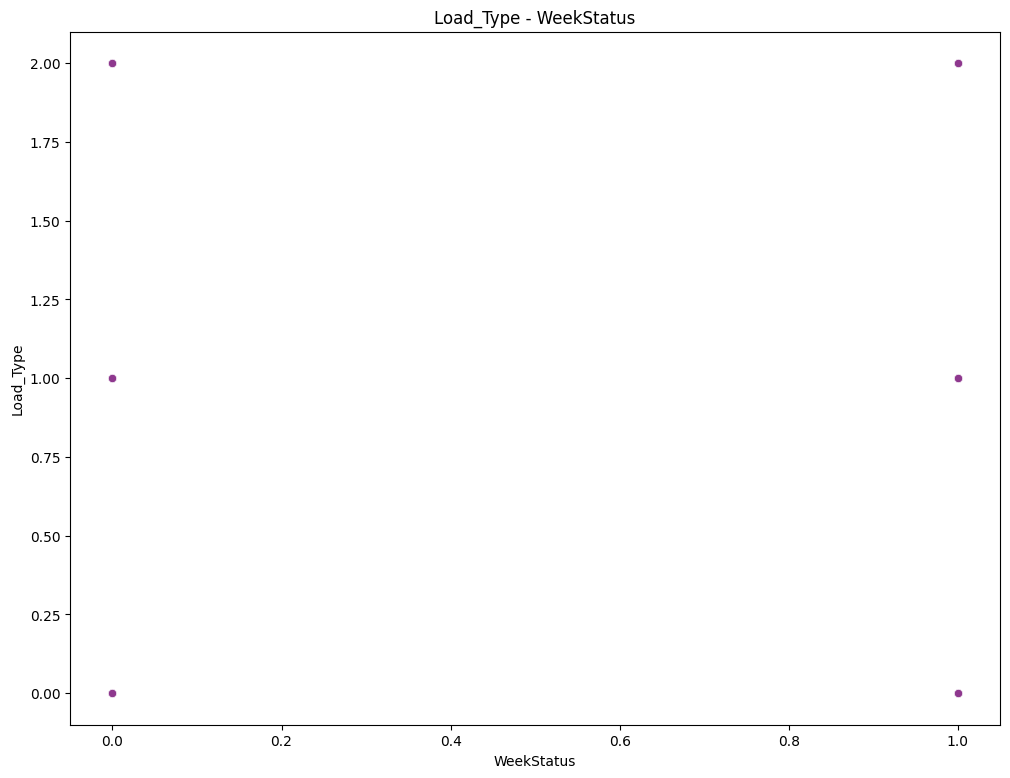

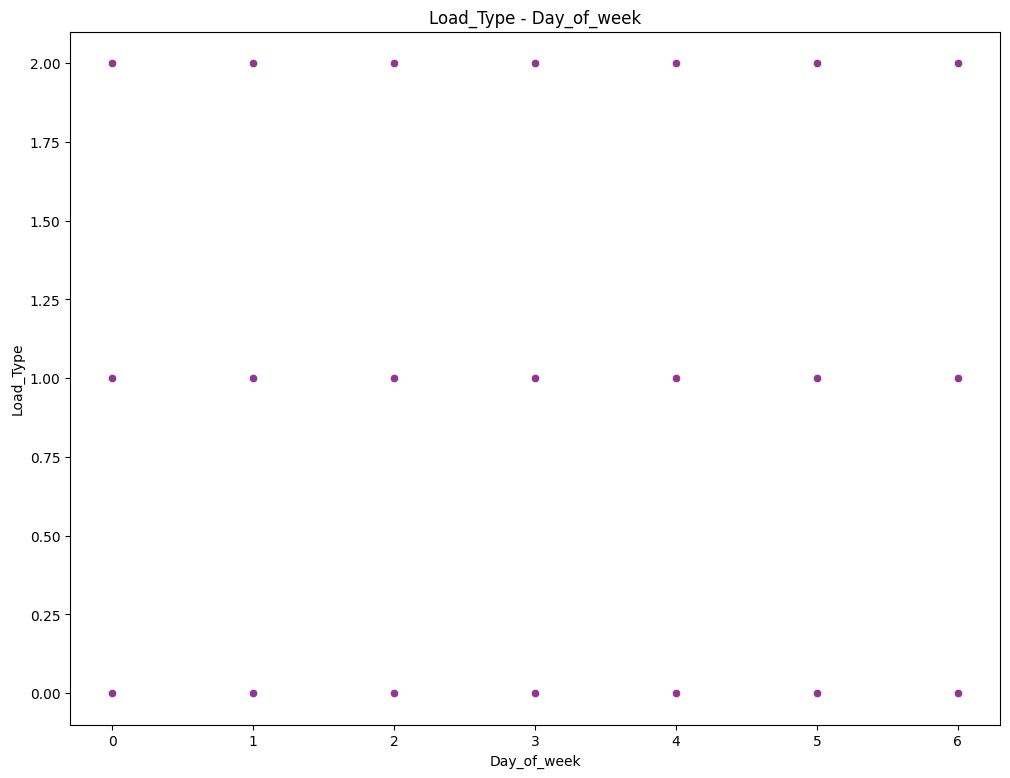

In [ ]:
# Melihat sebaran nilai-nilai dari kolom dependen terhadap kolom target (Load_Type)
# Menggunakan scatterplot

for i in df.columns[:-1]:
  plt.figure(figsize=(12,9))
  plt.title("{} - {}".format('Load_Type', i))
  sns.scatterplot(x=i,y='Load_Type',data=df,color='#8E388E')
  plt.show()

#### Ringkasan Metode



In [ ]:
# Menentukan kolom yang akan dihapus dari dataset
columns_to_drop = ['Load_Type']


# Menghapus kolom 'Load_Type' dari data fitur
X = df.drop(columns=columns_to_drop)

# kolom 'Load_Type' sebagai target
y = df['Load_Type']

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54211    2
54212    2
54213    2
54214    2
54215    2
Name: Load_Type, Length: 54216, dtype: int64

In [ ]:
# import methods yang diperlukan
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)





In [ ]:
# Normalisasi Data
from sklearn.preprocessing import LabelEncoder, StandardScaler
SS = StandardScaler()
X_train_scaled = SS.fit_transform(X_train)
X_test = SS.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Model Exploration (at least 3 scheme)

In [ ]:
# Membuat Baseline Model Random Forest
clf = RandomForestClassifier()
#Model Basis
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)


# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Model accuracy score with 10 decision-trees : 0.9236
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4565
           1       0.91      0.87      0.89      4503
           2       0.88      0.93      0.91      4486

    accuracy                           0.92     13554
   macro avg       0.92      0.92      0.92     13554
weighted avg       0.92      0.92      0.92     13554



In [ ]:
# Peningkatan Learning Rate (model 2)
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Model accuracy score with 100 decision-trees : 0.9236


In [ ]:
# (Model 3)

clf3 = RandomForestClassifier(criterion = 'gini', max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 4, n_estimators = 200)

# fit the model to the training set
clf3.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = clf3.predict(X_test)

# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Model accuracy score with 100 decision-trees : 0.9174


In [ ]:
#Model 4
clf4 = RandomForestClassifier(criterion =  'entropy', max_features= 'log2', min_samples_leaf = 3, n_estimators = 300)
# fit the model to the training set
clf4.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = clf4.predict(X_test)

# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Model accuracy score with 100 decision-trees : 0.9171


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy','log_loss'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


Best Parameters:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 92.29%


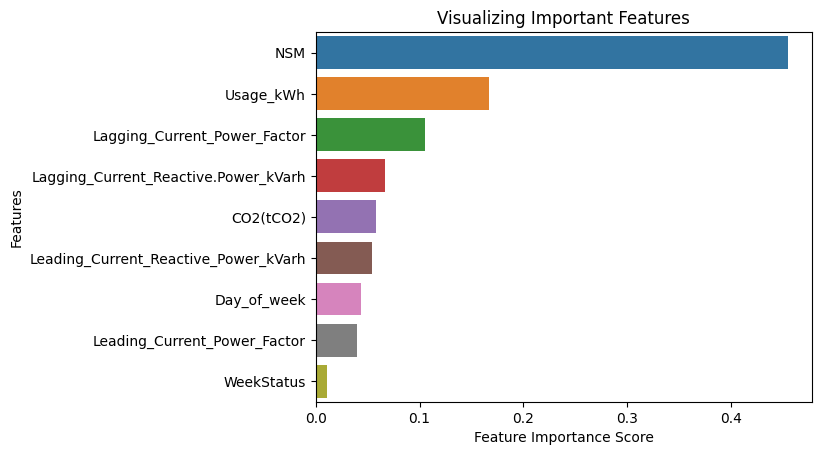

In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set
clf.fit(X_train, y_train)
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")


# Visualize the graph
plt.show()

## Hasil dan Analisis
### Data Preprocessing
Data preprocessing adalah tahap penting dalam analisis data dan pembuatan model di dalam machine learning dan data science. Tujuan dari data preprocessing adalah untuk membersihkan, mengatur, dan mengubah data mentah menjadi bentuk yang lebih baik dan lebih siap digunakan untuk analisis dan pemodelan. Datasets yang digunakan tidak memiliki _null value_ sehingga proses penggantian data _null_ tidak dilakukan.
Pada tahap ini, beberapa proses yang terjadi sebagai mana berikut:
>Mengubah Format data
>>Pada _dataset_ yang digunakan, ada beberapa _value_ bertipe _object_ sehingga diharuskan untuk mengubahnya ke bentuk number yang membantu untuk proses pemodelan data, dengan menggunakan function _map()_ dengan parameter _object_ yang ingin dirubah.

>Mereduksi Dimensi
>>Menghilangkan beberapa data yang tidak akan dimasukan ke dalam perhitungan karena data tersebut tidak relevan serta memisahkan data yang bernilai target ke dalam variable nya sendiri. Hal ini dapat dilakukan dengan menggunakan fungsi _drop()_

>_Synthetic Minority Over-sampling Technique_
>>Data yang terdapat pada dataset tidak seimbang sehingga dilakukan SMOTE yang mana akan menghasilkan sampel sintetis sehingga mengimbangi distribusi kelas.

>Standardisasi
>>Data yang berasal dari berbagai sumber atau dengan skala yang berbeda dapat diubah menjadi skala yang konsisten. Ini membantu memastikan bahwa variabel-variabel memiliki dampak yang seimbang pada model. Pada dataset ini, proses standardisasi menggunakan fungsi _StandarScaler()_. Hal ini agar bisa mengurangi data memiliki skala yang berbeda antar satu nilai dengan nilai lainnya serta mempercepat pelatihan model.
###Pengujian Random Forest


![picture](https://drive.google.com/uc?id=14MtT3ZK0rNP2KElqHybXZvS89LjGBA0S)

Pada baseline dan model 1 mendapatkan nilai tertinggi daripada penggunaan parameter tuning.

## Kesimpulan


Berdasarkan hasil randomforest yang disajikan dalam tabel, dapat disimpulkan bahwa:

Model terbaik adalah Model 1, dengan akurasi 92,36%. Model 2 dan  Model 3 memiliki akurasi yang hampir sama, yaitu 91,74% dan 91,71%.
Secara umum, model-model randomforest yang diuji memiliki akurasi yang cukup tinggi, yaitu di atas 90%. Hal ini menunjukkan bahwa model-model tersebut dapat digunakan untuk memprediksi hasil dengan cukup akurat.



Model 1 adalah model yang menggunakan parameter n_estimator = 100. Model ini memiliki akurasi tertinggi, yaitu 92,36%. Hal ini menunjukkan bahwa parameter default randomforest sudah cukup baik untuk menghasilkan model dengan akurasi yang tinggi.

Model 2 adalah model  yang menggunakan parameter yang berbeda dari default yaitu (criterion = 'gini', max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 4, n_estimators = 200). Model ini memiliki akurasi yang sedikit lebih rendah dari Model 1, yaitu 91,74%. Hal ini menunjukkan bahwa perubahan parameter tidak terlalu berpengaruh terhadap akurasi model.

Model 3 adalah model  yang menggunakan parameter yang berbeda lagi dari default yaitu(criterion =  'entropy', max_features= 'log2', min_samples_leaf = 3, n_estimators = 300). Model ini memiliki akurasi yang sedikit lebih rendah dari Model 2, yaitu 91,71%. Hal ini menunjukkan bahwa perubahan parameter tidak terlalu berpengaruh terhadap akurasi model.

Berdasarkan kesimpulan tersebut, dapat disarankan untuk menggunakan Model 1 sebagai model randomforest yang digunakan untuk memprediksi hasil. Model ini memiliki akurasi yang tertinggi dan menggunakan parameter default, sehingga lebih mudah untuk diterapkan.